In [37]:
import keras
from keras import layers
from keras.datasets import reuters
import numpy as np
from tensorflow.python.keras.utils.np_utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [38]:
def vectorize_seq(seqs, dimensions=10000):
    results = np.zeros((len(seqs), dimensions))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [39]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/9
16/16 [==============================] - 1s 46ms/step - loss: 3.1841 - acc: 0.4528 - val_loss: 1.7657 - val_acc: 0.6440
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.5407 - acc: 0.6943 - val_loss: 1.3174 - val_acc: 0.7240
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1077 - acc: 0.7635 - val_loss: 1.1377 - val_acc: 0.7480

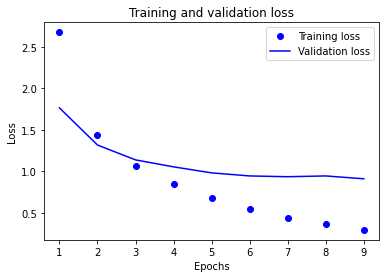

In [41]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

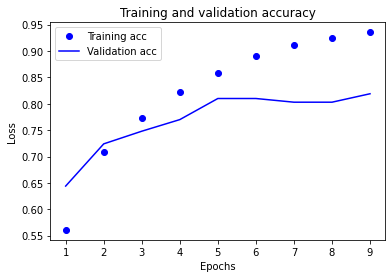

In [42]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [45]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'